Loaded 699 rows from batting_card.csv


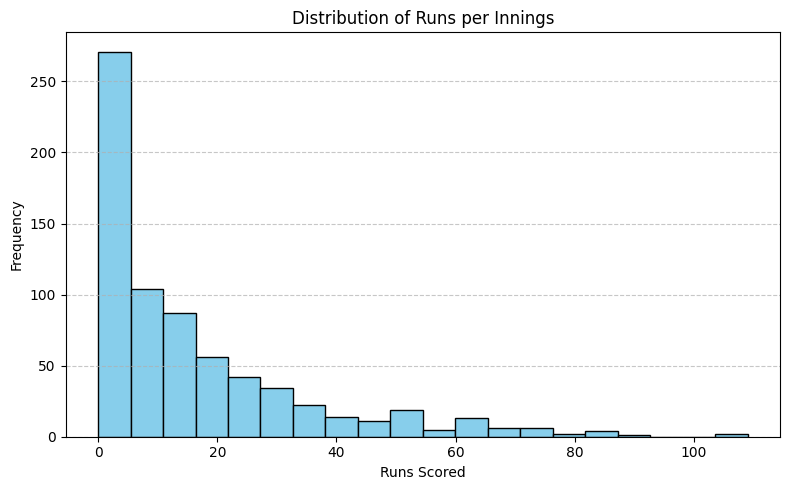

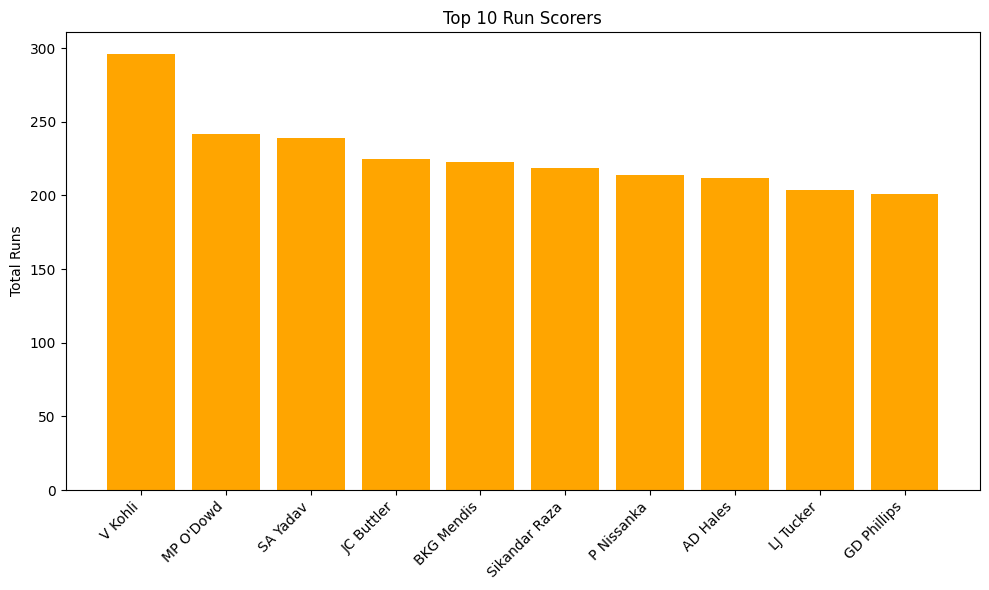

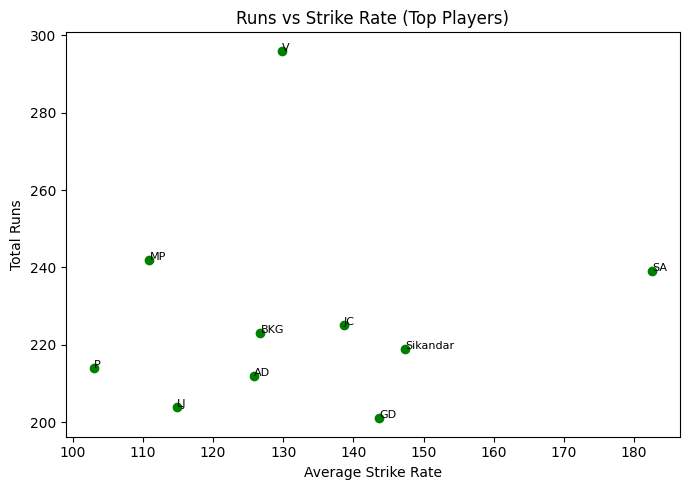

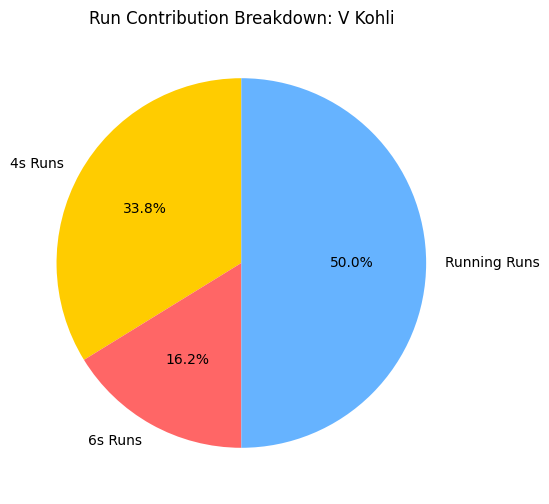


Top 5 Players Summary:
V Kohli                    Runs:  296  Avg: 49.3  SR: 129.9  Boundary%: 50.0
MP O'Dowd                  Runs:  242  Avg: 30.2  SR: 110.9  Boundary%: 56.2
SA Yadav                   Runs:  239  Avg: 39.8  SR: 182.6  Boundary%: 66.1
JC Buttler                 Runs:  225  Avg: 37.5  SR: 138.6  Boundary%: 61.3
BKG Mendis                 Runs:  223  Avg: 27.9  SR: 126.7  Boundary%: 57.4

Analysis complete — visualizations generated using only matplotlib.


In [ ]:
# T20 Cricket Analysis using only matplotlib and built-in libraries
# ---------------------------------------------------------------
# This script loads batting_card.csv, computes batting statistics,
# and generates visualizations using only matplotlib and built-in libraries.

import csv
import matplotlib.pyplot as plt
from collections import defaultdict

# ---------------------
# Step 1: Load dataset
# ---------------------

filename = 'batting_card.csv'  # Adjust path if needed

data = []
with open(filename, 'r', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        data.append(row)

print(f"Loaded {len(data)} rows from {filename}")

# ----------------------------
# Step 2: Clean and preprocess
# ----------------------------

for row in data:
    # Clean numeric fields
    for field in ['runs', 'ballsFaced', 'fours', 'sixes', 'strikeRate']:
        val = row.get(field, '').strip()
        if val in ('', '-', 'NA', 'nan', 'None'):
            row[field] = 0.0
        else:
            try:
                row[field] = float(val)
            except ValueError:
                row[field] = 0.0

# --------------------
# Step 3: Calculations
# --------------------

# Player-level aggregation
player_stats = defaultdict(lambda: {'runs': 0, 'innings': 0, 'fours': 0, 'sixes': 0, 'strike_rates': []})

for row in data:
    name = row.get('name') or row.get('fullName') or 'Unknown'
    player_stats[name]['runs'] += row['runs']
    player_stats[name]['innings'] += 1
    player_stats[name]['fours'] += row['fours']
    player_stats[name]['sixes'] += row['sixes']
    if row['strikeRate']:
        player_stats[name]['strike_rates'].append(row['strikeRate'])

# Compute averages and boundary ratios
for name, stats in player_stats.items():
    inns = max(stats['innings'], 1)
    stats['avg_runs'] = stats['runs'] / inns
    if stats['strike_rates']:
        stats['avg_sr'] = sum(stats['strike_rates']) / len(stats['strike_rates'])
    else:
        stats['avg_sr'] = 0.0
    total_boundary_runs = stats['fours'] * 4 + stats['sixes'] * 6
    stats['boundary_pct'] = (total_boundary_runs / stats['runs'] * 100) if stats['runs'] > 0 else 0.0

# ---------------------------
# Step 4: Prepare data visuals
# ---------------------------

# Sort players by total runs
top_players = sorted(player_stats.items(), key=lambda x: x[1]['runs'], reverse=True)[:10]
names = [p[0] for p in top_players]
runs = [p[1]['runs'] for p in top_players]

# 1. Histogram of runs per innings
runs_per_innings = [row['runs'] for row in data]
plt.figure(figsize=(8,5))
plt.hist(runs_per_innings, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Runs per Innings')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Top run scorers
plt.figure(figsize=(10,6))
plt.bar(names, runs, color='orange')
plt.title('Top 10 Run Scorers')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Scatter plot: Runs vs Strike Rate
sr_values = [p[1]['avg_sr'] for p in top_players]
plt.figure(figsize=(7,5))
plt.scatter(sr_values, runs, color='green')
for i, name in enumerate(names):
    plt.text(sr_values[i], runs[i], name.split()[0], fontsize=8, ha='left')
plt.title('Runs vs Strike Rate (Top Players)')
plt.xlabel('Average Strike Rate')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()

# 4. Pie chart for boundary contribution (top player)
leader = top_players[0]
leader_name = leader[0]
leader_stats = leader[1]

fours_runs = leader_stats['fours'] * 4
sixes_runs = leader_stats['sixes'] * 6
running_runs = max(leader_stats['runs'] - (fours_runs + sixes_runs), 0)

plt.figure(figsize=(6,6))
plt.pie([fours_runs, sixes_runs, running_runs],
        labels=['4s Runs', '6s Runs', 'Running Runs'],
        autopct='%1.1f%%', startangle=90, colors=['#ffcc00','#ff6666','#66b3ff'])
plt.title(f'Run Contribution Breakdown: {leader_name}')
plt.show()

# ----------------------
# Step 5: Print summary
# ----------------------

print('\nTop 5 Players Summary:')
for name, s in top_players[:5]:
    print(f"{name:25s}  Runs: {s['runs']:4.0f}  Avg: {s['avg_runs']:.1f}  SR: {s['avg_sr']:.1f}  Boundary%: {s['boundary_pct']:.1f}")

print('\nAnalysis complete — visualizations generated using only matplotlib.')
